# Red Wine Quality Prediction
Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

# Loading the Data From the Local system.

In [89]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [204]:
import pandas as pd
df=pd.read_csv("redwine.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [205]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [206]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [207]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
929,8.7,0.33,0.38,3.3,0.063,10.0,19.0,0.99468,3.30,0.73,12.0,7
1126,5.8,0.29,0.26,1.7,0.063,3.0,11.0,0.99150,3.39,0.54,13.5,6
789,8.6,0.63,0.17,2.9,0.099,21.0,119.0,0.99800,3.09,0.52,9.3,5
299,6.9,0.67,0.06,2.1,0.080,8.0,33.0,0.99845,3.68,0.71,9.6,5
936,8.8,0.30,0.38,2.3,0.060,19.0,72.0,0.99543,3.39,0.72,11.8,6


# EDA Process

In [208]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [209]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [210]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

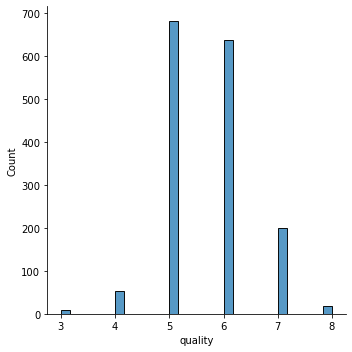

In [211]:
sns.displot(df['quality'])

#Quality Column's data is not properly distributed and so we will convert it into 0 and 1


[3,4,5] = 0 Bad Wine


[6,7,8] = 1 Good Wine


In [212]:
#df.quality=df.quality.replace([3,4,5],0)
#df.quality=df.quality.replace([6,7,8],1)

#df.quality.value_counts()

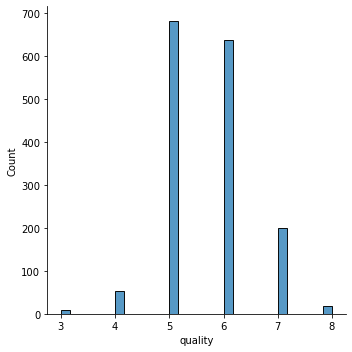

In [213]:
sns.displot(df['quality'])

In [214]:
df.shape

(1599, 12)

In [215]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

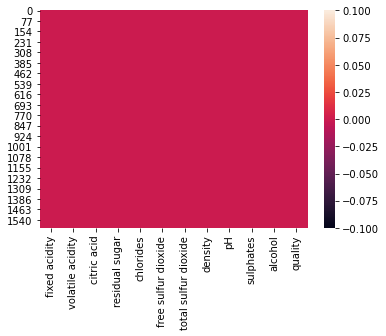

In [216]:
import seaborn as sns
sns.heatmap(df.isnull())

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Scatter plot

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

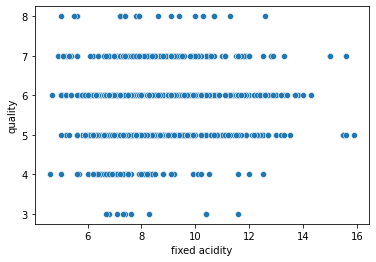

In [218]:
import seaborn as sns
sns.scatterplot(x="fixed acidity",y= "quality",data=df)

as major data is distributed 6 to 14 @fixed acidity

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

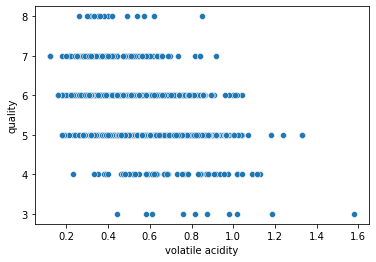

In [219]:
sns.scatterplot(x="volatile acidity",y= "quality",data=df)

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

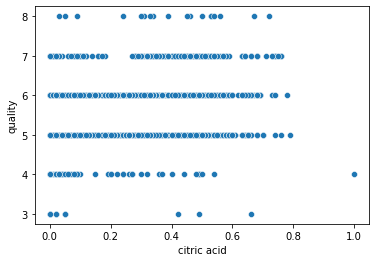

In [220]:
sns.scatterplot(x="citric acid",y= "quality",data=df)

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

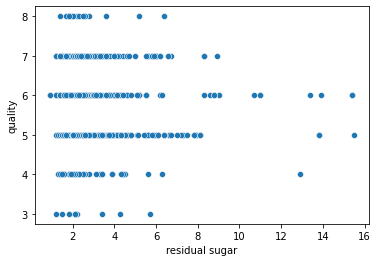

In [221]:
sns.scatterplot(x="residual sugar",y= "quality",data=df)

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

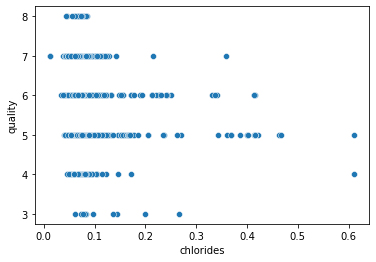

In [222]:
sns.scatterplot(x="chlorides",y= "quality",data=df)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

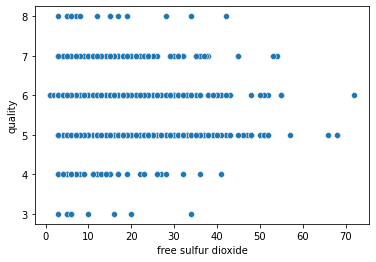

In [223]:
sns.scatterplot(x="free sulfur dioxide",y= "quality",data=df)

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

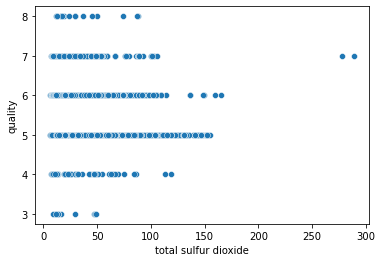

In [224]:
sns.scatterplot(x="total sulfur dioxide",y= "quality",data=df)

<AxesSubplot:xlabel='density', ylabel='quality'>

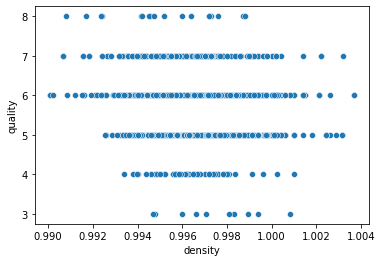

In [225]:
sns.scatterplot(x="density",y= "quality",data=df)

<AxesSubplot:xlabel='pH', ylabel='quality'>

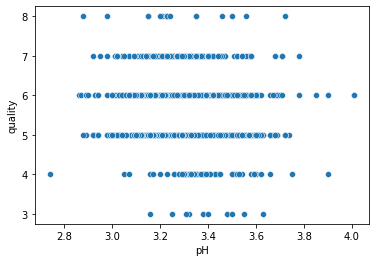

In [226]:
sns.scatterplot(x="pH",y= "quality",data=df)

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

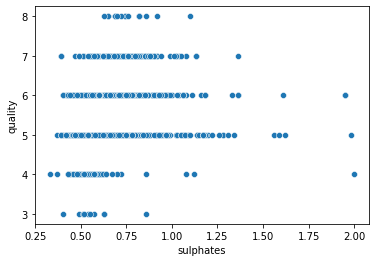

In [227]:
sns.scatterplot(x="sulphates",y= "quality",data=df)

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

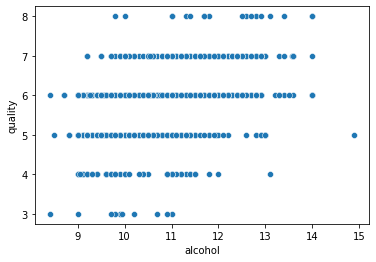

In [228]:
sns.scatterplot(x="alcohol",y= "quality",data=df)

From the above Observations data is not normally distribute

In [229]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Correlation:

In [230]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

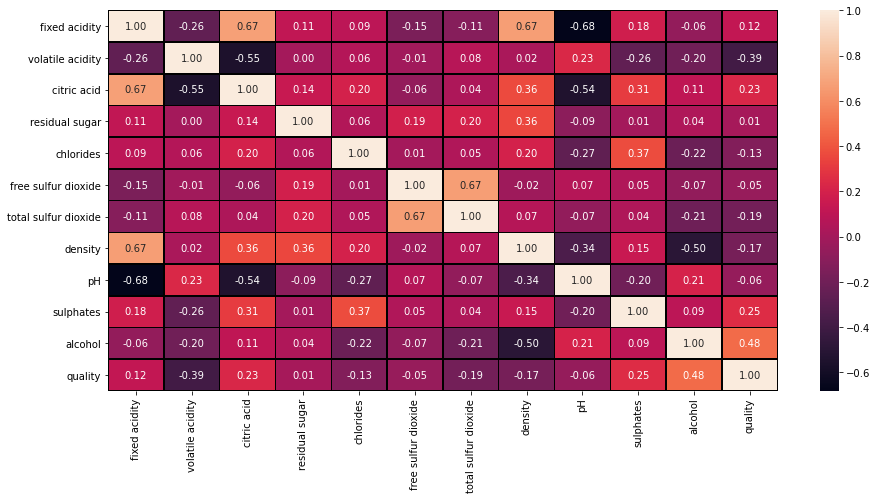

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')


Correlation:
From the above result it is clear that some columns making positive correlation and some making negative correlation.
positive correlation columns are:
    
    1.fixed acidity
    2.citric acid
    3.residual sugar
    4.sulphates
    5.alcohol
    
Negative correlation columns are:

    1.volatile acidity
    2. cholrides
    3.free sulphur di oxide
    4.total sulphur di oxide
    5.density
    6.ph
    

The positively correlated columns has a great impact on the target column while the negative correlated has less or zero impact on the target column.

# Describe Heatmap

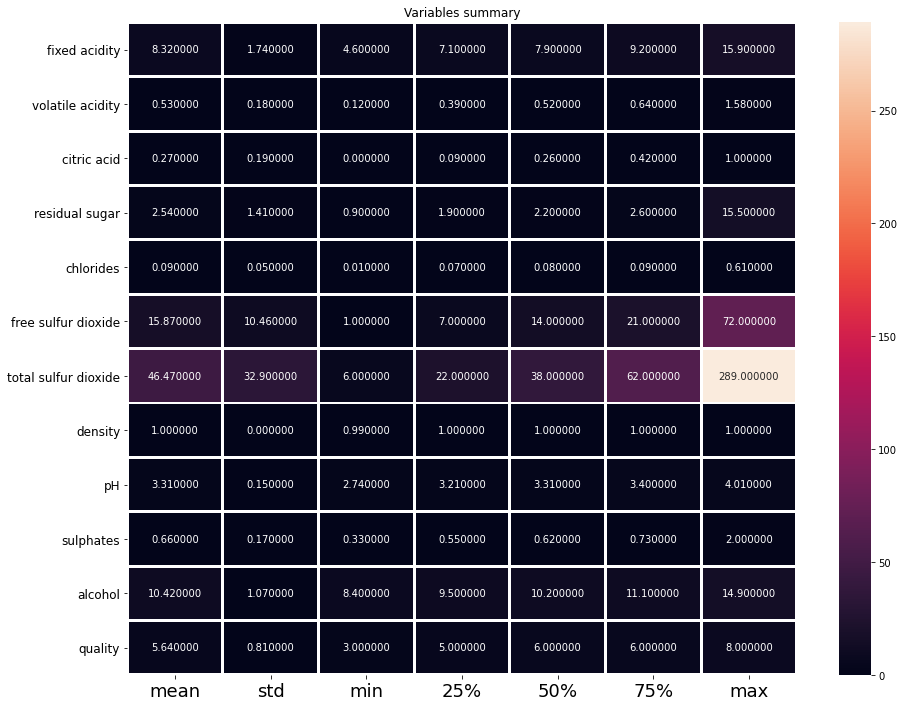

In [232]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()


# Discription of dataset

In [233]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


key observations:


    1 the mean is more than median (50th percentile) in all columns
    2 there is large difference in 75% percentile and max in residual sugar, 
    free sulphur diaoxide,totalsulfur diaoxide.
    3 from above two observations there is outliers are present in anove three columns.

# Exploiring data Variables

In [234]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Target/dependent variables is discreate and categorical in nature
quality score scale ranges from 0 to 1;
where 0 is low quality and 1 is best

only scores obtained are between 0 to 1.

In [235]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


AxesSubplot(0.125,0.125;0.62x0.755)


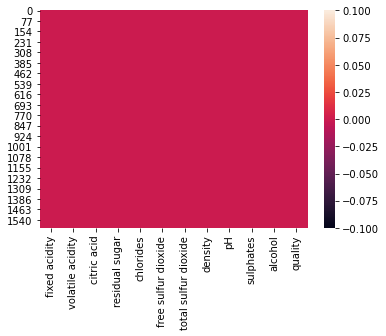

In [236]:
print(sns.heatmap(df.isnull()))


Dataset has no missing values.
if there were any , you would notice in figure represented by different colour shade
do try it out with other dataset which as missing values,you'll see the differemce.
Ex.in titanic dataset you will find " age" and 'cabin' columns with different shades with this code.

# Now use subplot and displot to check data are normalised or not.

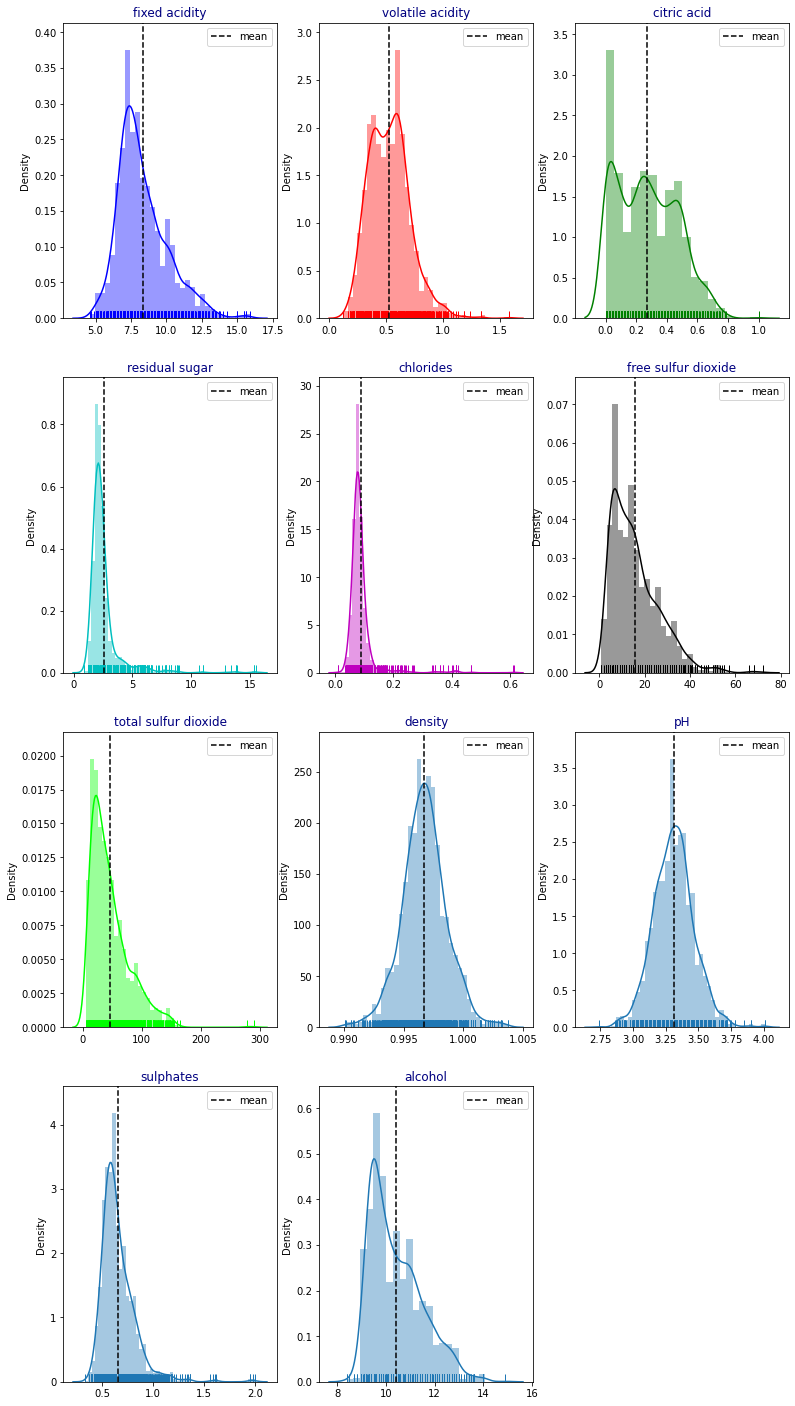

In [237]:
import itertools

cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
length = len(cols)
cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,3,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

observation:
    As building blocks are out of the normal distribution curve;hence outliers are present and we do data cleaning as well.

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

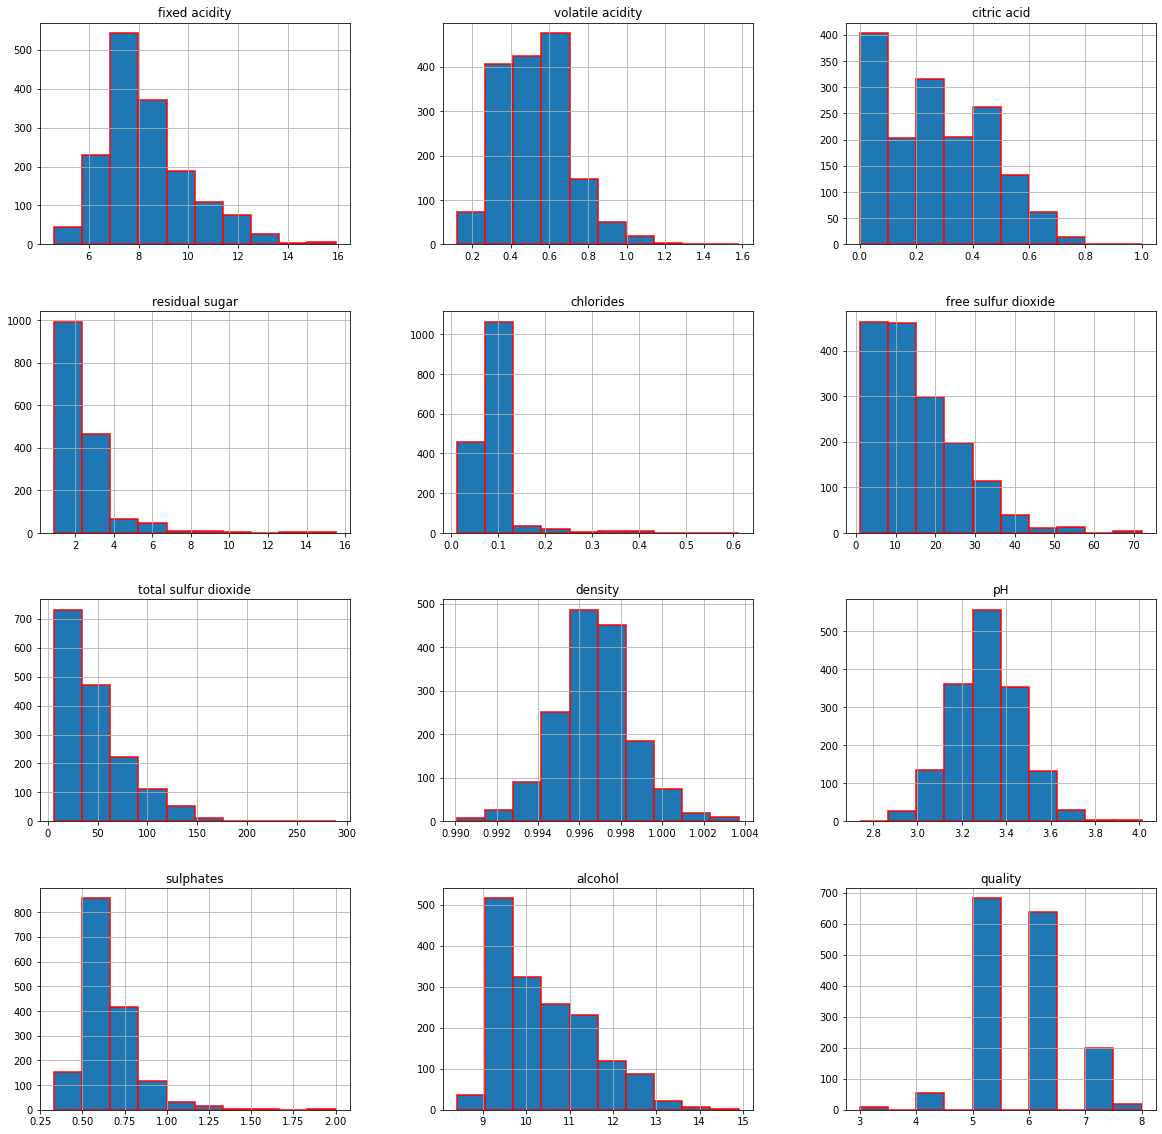

In [238]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

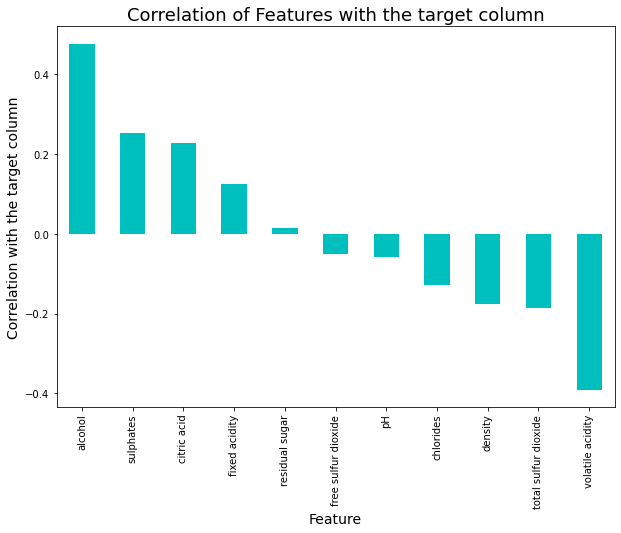

In [239]:
plt.figure(figsize=(10,7))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with the target column',fontsize=18)
plt.show()


In [240]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Skewness:
From the above observation the some columns falls under high skewness:

# Detecting outliers 

<AxesSubplot:>

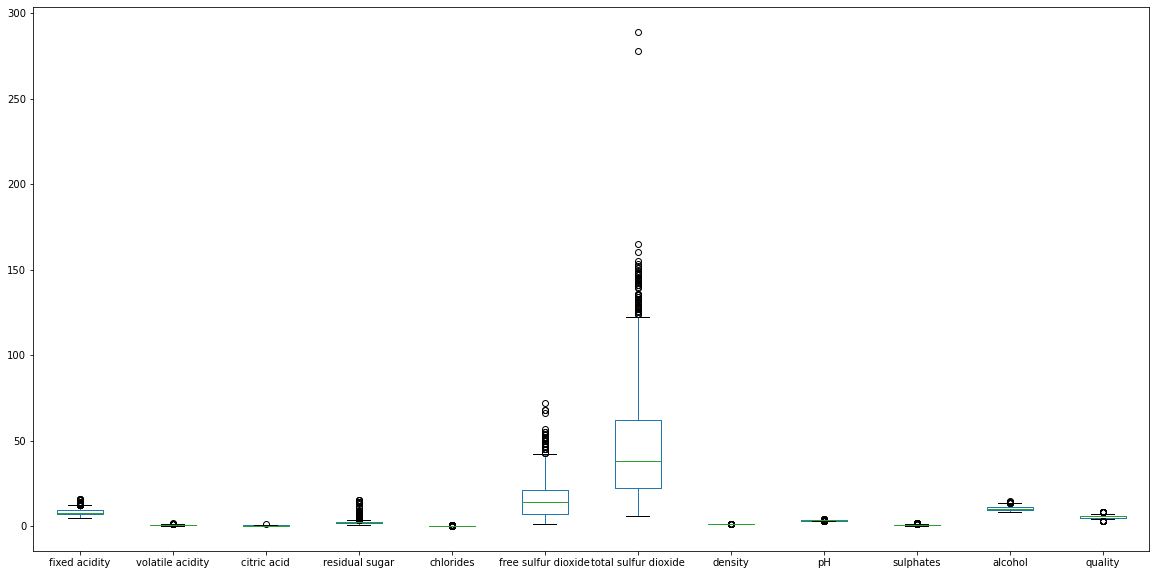

In [241]:
df.plot.box(figsize=(20,10))

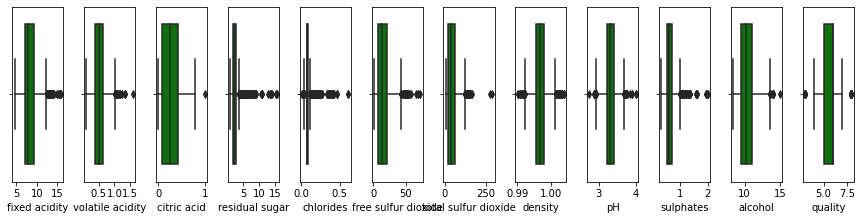

In [242]:
collist=df.columns.values
ncol=30
nrows=30
plt.figure(figsize=(ncol,3*(ncol)))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()


From above ploting we can find that there is outliers are present in all columns.

# Check the percentage of data falls under outliers:

In [373]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
         555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
         639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
         690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
         821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
         982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
        1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
        1244, 1244, 1260, 1269, 1269, 

In [378]:
df_new=df[(z<2.5).all(axis=1)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [380]:
percentage_loss=((1599-1321)/1599)*100
print(percentage_loss)

17.38586616635397


In [381]:
df_new.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# the data loss is below 10 percentile so we can proceed futher data cleaning.

In [382]:
#because volatile acidity made negativly correlated with the target column.
df_new.drop(['residual sugar','total sulfur dioxide'],axis=1,inplace=True)


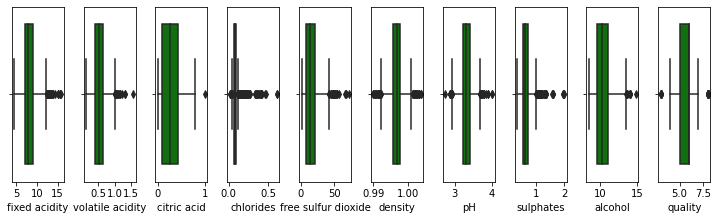

In [383]:
collist=df_new.columns.values
ncol=30
nrows=30
plt.figure(figsize=(ncol,3*(ncol)))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()


In [384]:
df_new.shape

(1321, 10)

In [385]:
x=df_new.iloc[:,0:-1]
x

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,11.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,25.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,15.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,17.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,11.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,39.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,29.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,32.0,0.99547,3.57,0.71,10.2


In [386]:
x.shape

(1321, 9)

In [387]:
y=df_new.iloc[:,-1]

In [388]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1321, dtype: int64

# Removing skewness by transforming data.

In [389]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.45061514,  1.09042186, -1.50744971, ...,  1.39060303,
        -0.58571769, -1.1208299 ],
       [-0.13542119,  2.0452886 , -1.50744971, ..., -0.89777489,
         0.46733982, -0.51390428],
       [-0.13542119,  1.41837347, -1.21776338, ..., -0.44187185,
         0.23127629, -0.51390428],
       ...,
       [-1.50709219, -0.02125802, -0.61960516, ...,  0.74296604,
         0.95958344,  0.79987428],
       [-1.98007332,  0.78056145, -0.6827172 , ...,  1.81517243,
         0.68777711, -0.00268141],
       [-1.85646335, -1.33597396,  1.14946092, ...,  0.52413323,
         0.31178512,  0.79987428]])

In [390]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.45061514,  1.09042186, -1.50744971, ...,  1.39060303,
        -0.58571769, -1.1208299 ],
       [-0.13542119,  2.0452886 , -1.50744971, ..., -0.89777489,
         0.46733982, -0.51390428],
       [-0.13542119,  1.41837347, -1.21776338, ..., -0.44187185,
         0.23127629, -0.51390428],
       ...,
       [-1.50709219, -0.02125802, -0.61960516, ...,  0.74296604,
         0.95958344,  0.79987428],
       [-1.98007332,  0.78056145, -0.6827172 , ...,  1.81517243,
         0.68777711, -0.00268141],
       [-1.85646335, -1.33597396,  1.14946092, ...,  0.52413323,
         0.31178512,  0.79987428]])

# Since the column has binary variable we will use logistic classification model

# Regressor Model Building:
Logistic Regression:

In [391]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [392]:
from imblearn.over_sampling import SMOTE

In [393]:
smt=SMOTE()
x_train,y_train=smt.fit_resample(x,y)

In [394]:
np.bincount(y)

array([  0,   0,   0,   0,  42, 566, 554, 159], dtype=int64)

In [395]:
y_train.value_counts()

7    566
5    566
6    566
4    566
Name: quality, dtype: int64

In [396]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuracy_score is:-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(y_test,pred_test)*100)

At random state 92  The model performs very well
At random_state:- 92
Training accuracy_score is:- 62.59469696969697
Testing accuracy_score is:- 62.64150943396226
At random state 110  The model performs very well
At random_state:- 110
Training accuracy_score is:- 62.310606060606055
Testing accuracy_score is:- 62.264150943396224
At random state 128  The model performs very well
At random_state:- 128
Training accuracy_score is:- 61.458333333333336
Testing accuracy_score is:- 61.50943396226415
At random state 139  The model performs very well
At random_state:- 139
Training accuracy_score is:- 61.458333333333336
Testing accuracy_score is:- 61.50943396226415
At random state 361  The model performs very well
At random_state:- 361
Training accuracy_score is:- 62.310606060606055
Testing accuracy_score is:- 62.264150943396224
At random state 380  The model performs very well
At random_state:- 380
Training accuracy_score is:- 61.07954545454546
Testing accuracy_score is:- 61.13207547169811
At ran

In [356]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=181,test_size=0.20)

In [357]:
x_train.shape

(1160, 9)

In [358]:
y_train.shape

(1160,)

In [359]:
x_test.shape

(291, 9)

In [360]:
y_test.shape

(291,)

In [361]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49,test_size=0.20)
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

pred_test=lr.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_test)

0.6288659793814433

In [362]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         8
           5       0.75      0.72      0.73       124
           6       0.55      0.66      0.60       116
           7       0.51      0.43      0.47        42
           8       0.00      0.00      0.00         1

    accuracy                           0.63       291
   macro avg       0.36      0.36      0.36       291
weighted avg       0.61      0.63      0.62       291



In [301]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lrs=accuracy_score (y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-", j)
    print("Cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lrs*100)
    print("\n")

At cv:- 2
Cross validation score is :- 54.5149615275007
accuracy_score is :- 63.230240549828174


At cv:- 3
Cross validation score is :- 58.37183238369009
accuracy_score is :- 63.230240549828174


At cv:- 4
Cross validation score is :- 58.78746023773649
accuracy_score is :- 63.230240549828174


At cv:- 5
Cross validation score is :- 58.4464984002844
accuracy_score is :- 63.230240549828174


At cv:- 6
Cross validation score is :- 59.613867837179804
accuracy_score is :- 63.230240549828174


At cv:- 7
Cross validation score is :- 58.58284227849444
accuracy_score is :- 63.230240549828174


At cv:- 8
Cross validation score is :- 58.45007892659826
accuracy_score is :- 63.230240549828174


At cv:- 9
Cross validation score is :- 58.241102846577895
accuracy_score is :- 63.230240549828174




In [304]:
lrscore=cross_val_score(lr,x,y,cv=6)
print("Cross validation score is :-",lsc*100)
print("accuracy_score is :-",lrs*100)

Cross validation score is :- 58.241102846577895
accuracy_score is :- 63.230240549828174


In [305]:
lrs*100

63.230240549828174

In [306]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,pred_test))
print(accuracy_score(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[ 0  3  5  0  0]
 [ 0 94 29  1  0]
 [ 0 24 74 18  0]
 [ 0  1 25 16  0]
 [ 0  0  1  0  0]]
0.6323024054982818
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         8
           5       0.77      0.76      0.76       124
           6       0.55      0.64      0.59       116
           7       0.46      0.38      0.42        42
           8       0.00      0.00      0.00         1

    accuracy                           0.63       291
   macro avg       0.36      0.36      0.35       291
weighted avg       0.61      0.63      0.62       291



# Regurlarization

As we can easily analyis that data is not correctely fit in our model lets do some regurlization.

In [307]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# 1. Ridge

In [308]:
from sklearn.linear_model import RidgeClassifier

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = RidgeClassifier()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [309]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

rd = RidgeClassifier(alpha=1, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd = rd.predict(x_test)

rds = r2_score(y_test,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,x,y,cv=3)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

R2 Score: 19.567848928701125
Cross Val Score: 55.34110158616087


In [310]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

Error:
Mean Absolute Error: 0.41580756013745707
Mean Squared Error: 0.47079037800687284
Root Mean Square Error: 0.6861416603055617


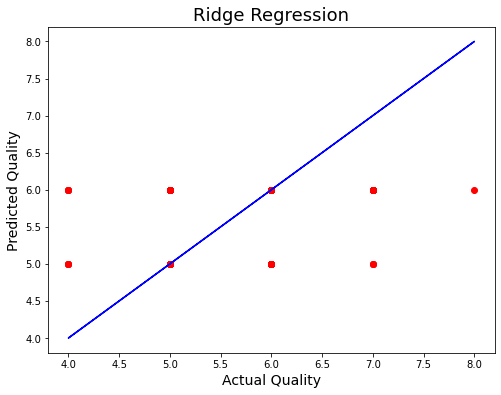

In [311]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rd, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Quality',fontsize=14)
plt.ylabel('Predicted Quality',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

In [186]:
print(accuracy_score(y_test,pred_rd))
print(confusion_matrix(y_test,pred_rd))
print(classification_report(y_test,pred_rd))

0.6013745704467354
[[ 0  4  4  0  0]
 [ 0 98 26  0  0]
 [ 0 39 77  0  0]
 [ 0  3 39  0  0]
 [ 0  0  1  0  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         8
           5       0.68      0.79      0.73       124
           6       0.52      0.66      0.59       116
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00         1

    accuracy                           0.60       291
   macro avg       0.24      0.29      0.26       291
weighted avg       0.50      0.60      0.55       291



# Ensemble Techniques:

In [170]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random']}
dt =DecisionTreeClassifier()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'gini', 'splitter': 'random'}


In [171]:
dt = DecisionTreeClassifier(criterion='gini', splitter='random')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision = dt.predict(x_test)

dts = r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x,y,cv=3)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 17.219464955816488
Cross Val Score: 45.1432735029573


In [173]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_decision)))


Error:
Mean Absolute Error: 0.41580756013745707
Mean Squared Error: 0.4845360824742268
Root Mean Square Error: 0.6960862607997854


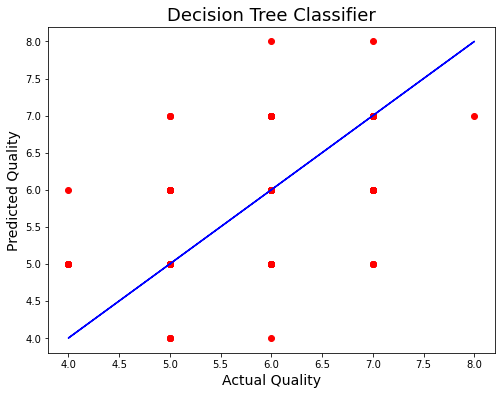

In [175]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_decision, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Quality',fontsize=14)
plt.ylabel('Predicted Quality',fontsize=14)
plt.title('Decision Tree Classifier',fontsize=18)
plt.show()

In [185]:
print(accuracy_score(y_test,pred_decision))
print(confusion_matrix(y_test,pred_decision))
print(classification_report(y_test,pred_decision))

0.6185567010309279
[[ 0  7  1  0  0]
 [ 4 84 33  3  0]
 [ 1 22 75 17  1]
 [ 0  4 16 21  1]
 [ 0  0  0  1  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         8
           5       0.72      0.68      0.70       124
           6       0.60      0.65      0.62       116
           7       0.50      0.50      0.50        42
           8       0.00      0.00      0.00         1

    accuracy                           0.62       291
   macro avg       0.36      0.36      0.36       291
weighted avg       0.62      0.62      0.62       291



In [178]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'criterion':['gini', 'entropy'],'n_estimators':[100,200,300]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'gini', 'n_estimators': 100}


In [180]:
rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_random = rf.predict(x_test)

rfs = r2_score(y_test,pred_random)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=3)
rfc = rfscore.mean() 
print('Cross Val Score:',rfc*100)

R2 Score: 45.400072630432156
Cross Val Score: 56.92540880287916


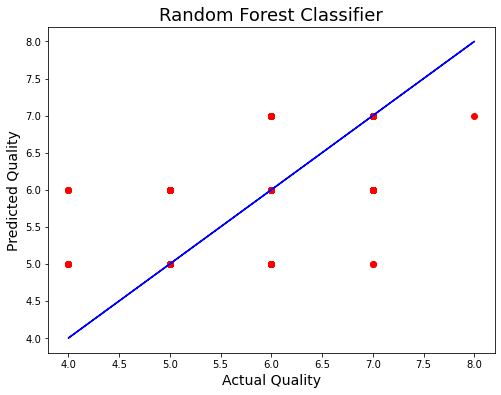

In [183]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_random, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Quality',fontsize=14)
plt.ylabel('Predicted Quality',fontsize=14)
plt.title('Random Forest Classifier',fontsize=18)
plt.show()

In [184]:
print(accuracy_score(y_test,pred_random))
print(confusion_matrix(y_test,pred_random))
print(classification_report(y_test,pred_random))

0.7319587628865979
[[  0   5   3   0   0]
 [  0 103  21   0   0]
 [  0  18  86  12   0]
 [  0   2  16  24   0]
 [  0   0   0   1   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         8
           5       0.80      0.83      0.82       124
           6       0.68      0.74      0.71       116
           7       0.65      0.57      0.61        42
           8       0.00      0.00      0.00         1

    accuracy                           0.73       291
   macro avg       0.43      0.43      0.43       291
weighted avg       0.71      0.73      0.72       291



In [190]:
from sklearn.svm import SVC


parameters = {'kernel':['linear', 'poly', 'rbf']}
sc = SVC()
clf = GridSearchCV(sc,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'kernel': 'rbf'}


In [193]:
sv = SVC(kernel='rbf')
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
pred_support = sv.predict(x_test)

svs = r2_score(y_test,pred_support)
print('R2 Score:',rfs*100)

svscore = cross_val_score(sv,x,y,cv=3)
svc = svscore.mean() 
print('Cross Val Score:',svc*100)

R2 Score: 45.400072630432156
Cross Val Score: 57.20203160914623


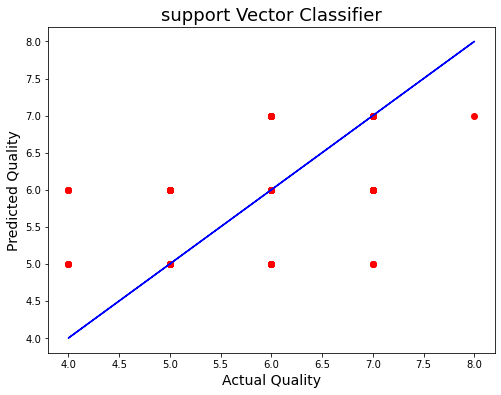

In [194]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_support, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Quality',fontsize=14)
plt.ylabel('Predicted Quality',fontsize=14)
plt.title('support Vector Classifier',fontsize=18)
plt.show()

In [195]:
print(accuracy_score(y_test,pred_support))
print(confusion_matrix(y_test,pred_support))
print(classification_report(y_test,pred_support))

0.6632302405498282
[[  0   4   4   0   0]
 [  0 101  23   0   0]
 [  0  25  79  12   0]
 [  0   3  26  13   0]
 [  0   0   0   1   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         8
           5       0.76      0.81      0.79       124
           6       0.60      0.68      0.64       116
           7       0.50      0.31      0.38        42
           8       0.00      0.00      0.00         1

    accuracy                           0.66       291
   macro avg       0.37      0.36      0.36       291
weighted avg       0.63      0.66      0.64       291



# The best model is Logistic Regression. Since the difference between the percentage score of cross validation and r2_score is optimum.

In [196]:
import pickle
filename = 'RedWine.pkl'
pickle.dump(lr, open(filename, 'wb'))

# Conclusion:

In [197]:
import numpy as np
a=np.array(y_test)
a

array([5, 5, 6, 5, 5, 7, 7, 6, 6, 5, 6, 5, 6, 7, 5, 8, 6, 6, 5, 5, 5, 7,
       5, 5, 5, 5, 6, 7, 7, 5, 7, 5, 5, 7, 6, 5, 5, 6, 7, 5, 6, 6, 6, 5,
       5, 7, 5, 5, 5, 5, 5, 7, 7, 5, 5, 6, 6, 4, 5, 6, 6, 4, 5, 5, 6, 5,
       6, 5, 4, 6, 6, 6, 7, 5, 5, 6, 5, 5, 7, 7, 5, 6, 6, 6, 6, 5, 5, 7,
       5, 6, 5, 6, 6, 5, 7, 5, 6, 6, 5, 6, 6, 5, 6, 7, 7, 6, 6, 5, 6, 7,
       6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 7, 5, 6, 5, 6, 5, 5, 6,
       5, 5, 6, 6, 5, 4, 6, 6, 5, 5, 7, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6,
       6, 6, 6, 5, 5, 7, 5, 5, 7, 6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 4,
       6, 7, 7, 6, 6, 6, 4, 6, 6, 5, 5, 6, 5, 5, 5, 6, 7, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 5, 6, 7, 5, 6, 5, 5, 5, 7, 6, 5, 5, 7, 6, 6, 6,
       5, 7, 5, 6, 6, 5, 5, 5, 4, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 7, 5, 6,
       5, 4, 6, 7, 7, 7, 5, 6, 5, 5, 5, 5, 5, 7, 6, 6, 6, 5, 6, 6, 5, 7,
       5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 7, 7, 7, 5, 7, 5, 5, 5, 6, 6, 6,
       6, 5, 7, 6, 5], dtype=int64)

In [198]:
predicted=np.array(lr.predict(x_test))
predicted

array([5, 6, 7, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 7,
       5, 5, 5, 6, 6, 6, 7, 6, 6, 6, 5, 7, 6, 5, 5, 7, 6, 6, 6, 6, 7, 5,
       6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 7, 6, 5, 6, 6, 6, 5, 6, 5, 5,
       6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 7, 7, 5, 6, 6, 6, 5, 5, 5, 7,
       5, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 7, 6, 6, 6, 6, 7, 6,
       6, 7, 6, 6, 6, 5, 7, 5, 7, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6,
       5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 7, 6, 6, 7, 6, 5, 6, 7, 5, 6, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 5, 7, 6, 6, 5, 5, 5, 6, 5, 5, 5, 7, 5, 5, 6,
       6, 6, 7, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 7, 6, 5, 7, 6, 6, 7,
       6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 7, 5, 5, 5, 6, 5, 6, 6,
       6, 6, 5, 5, 7, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 7, 5, 5,
       5, 5, 6, 7, 6, 6, 5, 6, 6, 5, 5, 5, 5, 7, 6, 6, 6, 5, 6, 6, 5, 7,
       6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 7, 6,
       6, 5, 6, 6, 5], dtype=int64)

In [199]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))

In [200]:
df_com

,original,predicted
0,5,5
1,5,6
2,6,7
3,5,6
4,5,5
...,...,...
286,6,6
287,5,5
288,7,6
289,6,6


Conclusion:

In [78]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({'Original':a,"Predicted":predicted}, index= range(len(a)))
df_com

,Original,Predicted
0,0,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
287,0,0
288,1,1
289,0,0
290,1,1


In [203]:
df_com.sample(10)

,original,predicted
21,7,7
176,6,6
192,7,6
167,5,5
228,4,5
150,5,5
36,5,5
77,5,5
254,5,5
68,4,6


# Our model performs with almost 70% Accuracy